In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

plt.rcParams['figure.figsize'] = [10, 8]

sns.set(style='whitegrid')
sns.set_palette('pastel')

# Ignore warnings
warnings.filterwarnings('ignore')

# Handle Korean font issues
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    # Windows
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    # Mac
    rc('font', family='AppleGothic')

# Handle minus sign display for Unicode
plt.rcParams['axes.unicode_minus'] = False

# Linear Regression

- 연속형 변수인 목표변수를 예측해내는것이 목적
- 연속형 변수는 165.5cm 등과같이 키나 몸무게등을 말한다.

# 장점
- 모델이 간단, 구현과 해석이 쉬움

# 단점
 - 최신알고리즘에 비해 예측력이 떨어짐
 - 선형관계를 전제로 하기 떄문에 벗어나는 데이터에서는 좋은 예측이 어려움

In [6]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'

data= pd.read_csv(file_url)

data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [7]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


# 연속형 변수와 범주형 변수
- 연속형 변수는 키와 같이 연속적으로 이어지는 변수
- 범주형 변수는 각 범주로 구성된 변수

In [25]:
x= data[['age','sex','bmi','children','smoker']]# 독립변수
y=data['charges']#종속변수

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

x_train

,age,sex,bmi,children,smoker
1306,29,0,21.850,0,1
124,47,0,33.915,3,0
588,61,0,35.910,0,0
1127,35,0,35.860,2,0
201,48,0,32.230,1,0
...,...,...,...,...,...
802,21,1,22.300,1,0
53,36,1,34.430,0,1
350,57,0,23.180,0,0
79,41,0,32.965,0,0


In [26]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

model.fit(x_train,y_train)



LinearRegression()

In [27]:
pred =  model.predict(x_test)

# 예측 모델 평가

In [28]:
## 테이블로 평가

comarsion= pd.DataFrame({'actual':y_test,'pred':pred})

comarsion

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


<Axes: xlabel='actual', ylabel='pred'>

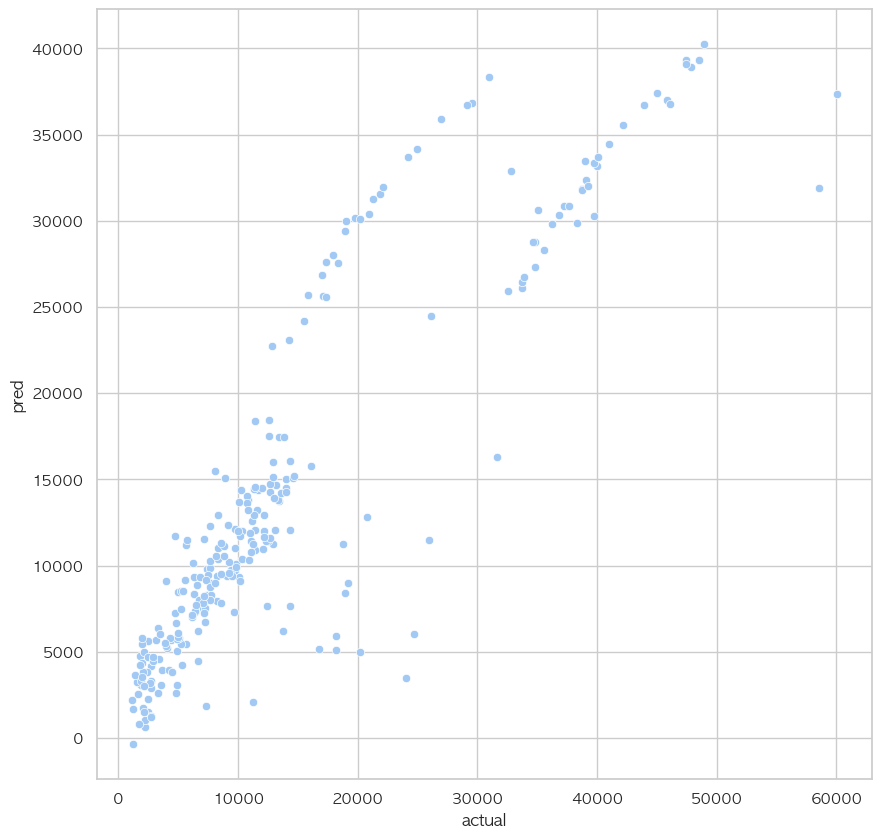

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x='actual',y='pred',data=comarsion)

# 통계적인 방법
- RMSE:연속형 변수를 평가할떄 흔하게 사용:실젯값과 예측값 사이의 오차를 각각 합산하는 개념
- 

# ex)
- MAE:절댓값 차이 사용 -> mean absolute error 0에 가까울수록 좋은 지표
- MSE:제곱차이 사용 -> mean squared erorr

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred) ** 0.5 # RMSE

5684.927776334485

In [33]:
mean_squared_error(y_test,pred,squared = False)  # RMSE가 가장 작은 모델을 사용

5684.927776334485

In [36]:
model.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [38]:
pd.Series(model.coef_,index=x.columns)

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

# age가 1증가하면 charges는 약 265만큼 증가